In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 15

In [2]:
dsi = pd.read_csv("C:/Users/canin/Downloads/DSI_kickstarterscrape_dataset - DSI_kickstarterscrape_dataset.tsv", sep= '\t')
dsi.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [3]:
dsi['pledged'].describe()

count    4.594500e+04
mean     4.980750e+03
std      5.674162e+04
min      0.000000e+00
25%      1.960000e+02
50%      1.310000e+03
75%      4.165000e+03
max      1.026684e+07
Name: pledged, dtype: float64

In [4]:
dsi['backers'].describe()

count    45957.000000
mean        69.973192
std        688.628479
min          0.000000
25%          5.000000
50%         23.000000
75%         59.000000
max      87142.000000
Name: backers, dtype: float64

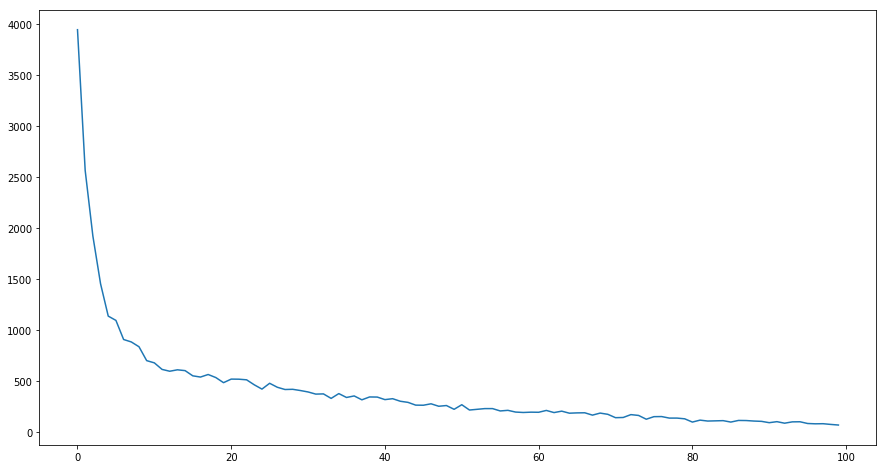

In [5]:
dsi.backers[dsi['backers'] < 100].value_counts().sort_index().plot(figsize=(15,8))

In [6]:
# Anderson-Darling Test
from scipy.stats import anderson

result = anderson(dsi['duration'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 2047.892
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


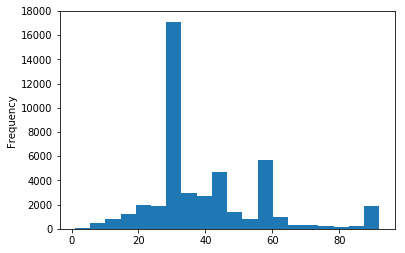

In [7]:
dsi['duration'].plot(kind='hist', bins=20)

In [8]:
dsi[dsi['status'] == 'successful']['location'].describe()

count            22339
unique            2664
top       New York, NY
freq              2239
Name: location, dtype: object

In [9]:
dsi[dsi['status'] == 'failed']['goal'].describe()

count    1.899600e+04
mean     1.635059e+04
std      2.191424e+05
min      5.000000e-01
25%      2.500000e+03
50%      5.000000e+03
75%      1.200000e+04
max      2.147484e+07
Name: goal, dtype: float64

status
canceled      AxesSubplot(0.125,0.125;0.775x0.755)
failed        AxesSubplot(0.125,0.125;0.775x0.755)
live          AxesSubplot(0.125,0.125;0.775x0.755)
successful    AxesSubplot(0.125,0.125;0.775x0.755)
suspended     AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration, dtype: object

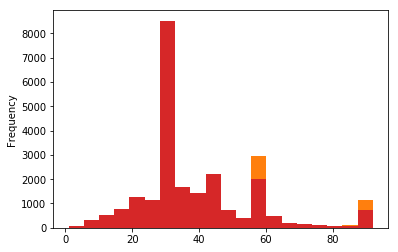

In [10]:
dsi.groupby('status')['duration'].plot(kind='hist', bins=20)

In [11]:
dsi_W_L_or_C = dsi[(dsi['status'] != 'canceled') & (dsi['status'] != 'live')]

category          status    
Art               failed        AxesSubplot(0.125,0.125;0.775x0.755)
                  successful    AxesSubplot(0.125,0.125;0.775x0.755)
Comics            failed        AxesSubplot(0.125,0.125;0.775x0.755)
                  successful    AxesSubplot(0.125,0.125;0.775x0.755)
Dance             failed        AxesSubplot(0.125,0.125;0.775x0.755)
                  successful    AxesSubplot(0.125,0.125;0.775x0.755)
Design            failed        AxesSubplot(0.125,0.125;0.775x0.755)
                  successful    AxesSubplot(0.125,0.125;0.775x0.755)
                  suspended     AxesSubplot(0.125,0.125;0.775x0.755)
Fashion           failed        AxesSubplot(0.125,0.125;0.775x0.755)
                  successful    AxesSubplot(0.125,0.125;0.775x0.755)
Film & Video      failed        AxesSubplot(0.125,0.125;0.775x0.755)
                  successful    AxesSubplot(0.125,0.125;0.775x0.755)
Film &amp; Video  failed        AxesSubplot(0.125,0.125;0.775x0.755)
     

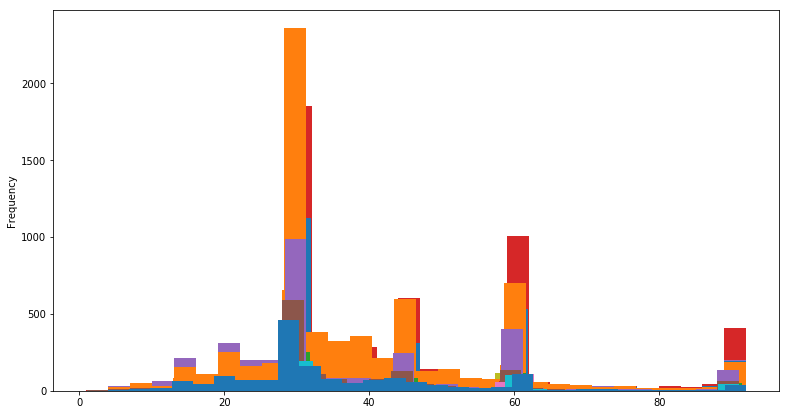

In [12]:
dsi_W_L_or_C.groupby(['category', 'status'])['duration'].plot(kind='hist', bins = 30, figsize=(13,7))

# Best time spent on campaign:

In [13]:
success = dsi[dsi['status'] == 'successful']['duration'].value_counts()
failure = dsi[dsi['status'] == 'failed']['duration'].value_counts()
perc = pd.DataFrame({'Success':success , 'Failure':failure}, index = dsi['duration'])
perc['Go For It'] = (perc['Success'] / (perc['Success'] + perc['Failure'])) * 100

In [14]:
perc = perc.drop_duplicates(subset=['Success', 'Failure'], keep='first')

Text(0.5, 1.0, 'Time Spent on Each Campaign')

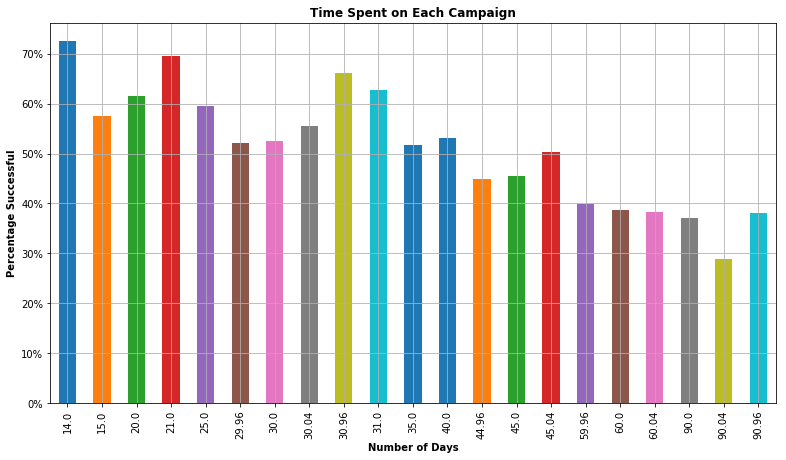

In [15]:
final = perc[   (perc['Success'] > 100) | (perc['Failure'] > 100)   ]['Go For It'].sort_values(ascending=False)
final = final.sort_index().plot(kind='bar', figsize=(13,7), grid= True)
final.set_yticklabels(['{:.0f}%'.format(int(x)) for x in final.get_yticks().tolist()])
final.set_facecolor('None')
plt.xlabel('Number of Days', fontweight='bold')
plt.ylabel('Percentage Successful', fontweight='bold')
plt.title('Time Spent on Each Campaign', fontweight='bold')

# The Best Places to Start a Campaign:

In [16]:
dsi[dsi['status'] == 'successful']['location'].value_counts().head()

New York, NY         2239
Los Angeles, CA      2014
Brooklyn, NY         1104
Chicago, IL           872
San Francisco, CA     795
Name: location, dtype: int64

In [17]:
dsi[dsi['status'] == 'failed']['location'].value_counts().head()

Los Angeles, CA      1627
New York, NY         1193
Chicago, IL           511
San Francisco, CA     448
Brooklyn, NY          419
Name: location, dtype: int64

In [18]:
success = dsi[dsi['status'] == 'successful']['location'].value_counts()
failure = dsi[dsi['status'] == 'failed']['location'].value_counts()
perc = pd.DataFrame({'Success':success , 'Failure':failure}, index = dsi['location'])
perc['Go For It'] = (perc['Success'] / (perc['Success'] + perc['Failure'])) * 100

Text(0.5, 1.0, 'Best Places to Start a Campaign')

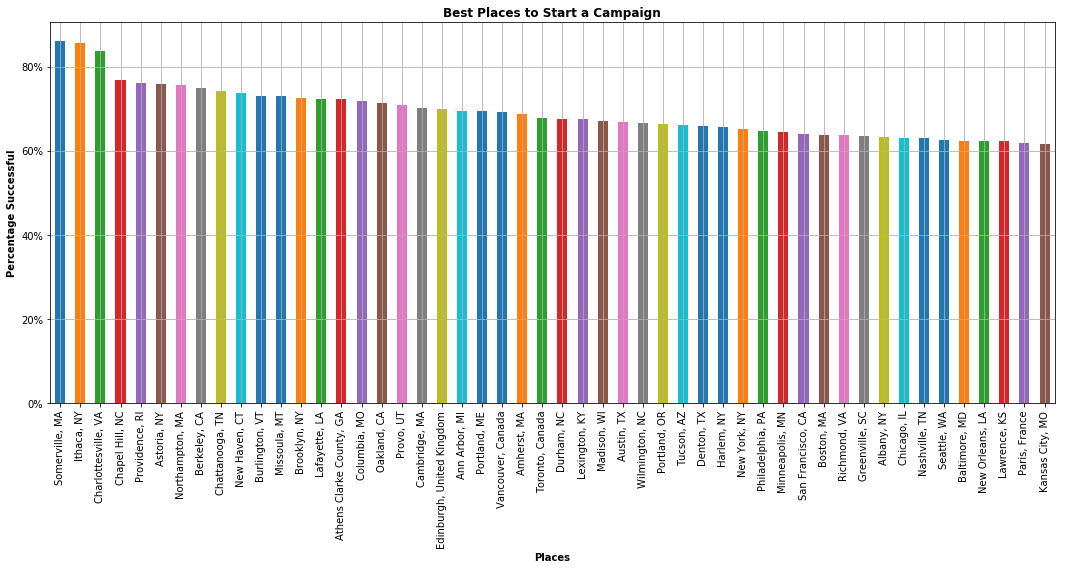

In [19]:
perc = perc.drop_duplicates(subset=['Success', 'Failure'], keep='first')
final = perc[   (perc['Success'] > 20) | (perc['Failure'] > 20)   ]['Go For It'].sort_values(ascending=False).head(50)
final = final.plot(kind='bar', figsize=(18,7), grid = True)
final.set_yticklabels(['{:.0f}%'.format(int(x)) for x in final.get_yticks().tolist()])
final.set_facecolor('None')
plt.xlabel('Places', fontweight='bold')
plt.ylabel('Percentage Successful', fontweight='bold')
plt.title('Best Places to Start a Campaign', fontweight='bold')

# To Determine the ideal goal for pledges:

In [20]:
dsi[dsi['status'] == 'successful']['goal'].value_counts().head()

5000.0    1981
2000.0    1569
3000.0    1546
1000.0    1487
2500.0    1279
Name: goal, dtype: int64

In [21]:
dsi[dsi['status'] == 'failed']['goal'].value_counts().head()

5000.0     1894
10000.0    1397
3000.0      959
2000.0      852
1000.0      820
Name: goal, dtype: int64

In [22]:
success = dsi[dsi['status'] == 'successful']['goal'].value_counts()
failure = dsi[dsi['status'] == 'failed']['goal'].value_counts()
perc = pd.DataFrame({'Success':success , 'Failure':failure}, index = dsi['goal'])
perc['Go For It'] = (perc['Success'] / (perc['Success'] + perc['Failure'])) * 100

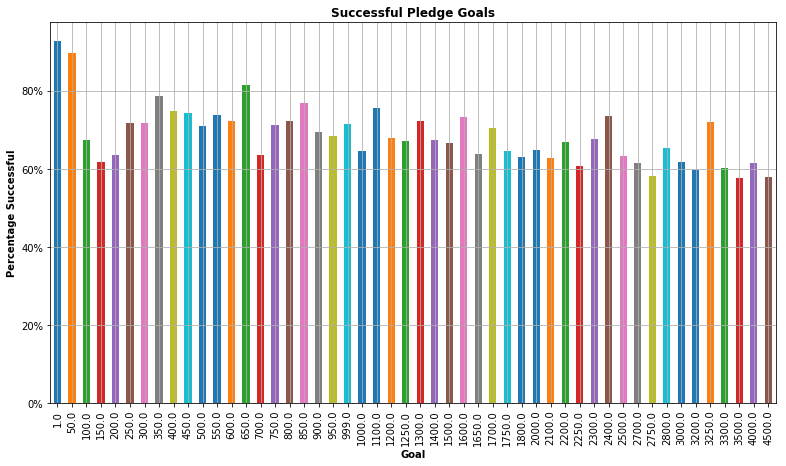

In [23]:
perc = perc.drop_duplicates(subset=['Success', 'Failure'], keep='first')
final = perc[   (perc['Success'] > 20) | (perc['Failure'] > 20)   ]['Go For It'].sort_values(ascending=False).head(50)
final = final.sort_index().plot(kind='bar',figsize=(13,7), grid=True)
final.set_yticklabels(['{:.0f}%'.format(int(x)) for x in final.get_yticks().tolist()])
final.set_facecolor('None')
plt.xlabel('Goal', fontweight='bold')
plt.ylabel('Percentage Successful', fontweight='bold')
plt.title('Successful Pledge Goals', fontweight='bold')
plt.savefig('demo.png', transparent=True)

# Best times for starting a campaign:

In [24]:
dsi['funded date'] = pd.to_datetime(dsi['funded date']).dt.month

In [25]:
success = dsi[dsi['status'] == 'successful']['funded date'].value_counts()
failure = dsi[dsi['status'] == 'failed']['funded date'].value_counts()
perc = pd.DataFrame({'Success':success , 'Failure':failure}, index = dsi['funded date'])
perc['Go For It'] = (perc['Success'] / (perc['Success'] + perc['Failure'])) * 100

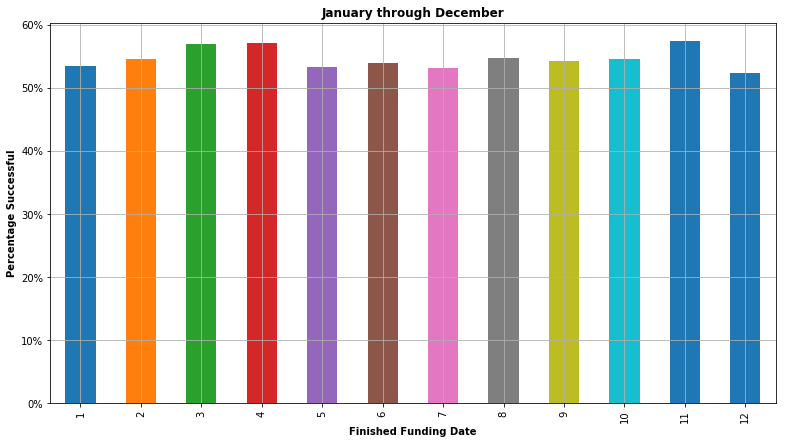

In [26]:
perc = perc.drop_duplicates(subset=['Success', 'Failure'], keep='first')
final = perc[   (perc['Success'] > 20) | (perc['Failure'] > 20)   ]['Go For It'].sort_values(ascending=False)
final = final.sort_index().plot(kind='bar',figsize=(13,7), grid=True)
final.set_yticklabels(['{:.0f}%'.format(int(x)) for x in final.get_yticks().tolist()])
plt.xlabel('Finished Funding Date', fontweight='bold')
final.set_facecolor('None')
plt.ylabel('Percentage Successful', fontweight='bold')
plt.title('January through December', fontweight='bold')
plt.savefig('demo.png', transparent=True)